In [1]:
!python --version

Python 3.11.3


Lets get the basic data loaded

In [2]:
# Not really needed
# !pip install kaggle

Lets get the Kaggle token installed. Manually move the kaggle jason file to the root .kaggle folder.

Lets download the data

In [3]:
# Only needed the first time
# !kaggle competitions download -c spaceship-titanic

Now to unzip it.

In [4]:
# !unzip ./spaceship-titanic.zip

Cool. Lets get the basic data into a dataframe.

In [5]:
import pandas as pd
import numpy as np
tdata = pd.read_csv('train.csv')

In [6]:
tdata.shape

(8693, 14)

In [7]:
tdata.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Lets get some basic summary statistics going.

In [8]:
tdata.describe(include = 'all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


Lets check for missing values

In [9]:
tdata.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Lets keep track of these missing values.

In [10]:
#From chatGPT
def add_missing_columns(df):
    # Not needed - lets modify the df in place.
    # # Create a copy of the original DataFrame to avoid modifying it directly
    # modified_df = df.copy()

    # Iterate through each column in the DataFrame
    for column in df.columns:
        # Check if there is at least one missing value in the column
        # if df[column].isna().any():
            # Create a boolean mask where True indicates missing values
        missing_mask = df[column].isna()
        
        # Convert the boolean mask to an integer mask (1 for missing, 0 for non-missing)
        missing_mask_int = missing_mask.astype(int)
        
        # Add "_missing" suffix to the column name to create a new column name
        new_column_name = f"{column}_missing"
        
        # Assign the integer mask as a new column in the modified DataFrame
        df[new_column_name] = missing_mask_int

    # Return the modified DataFrame
    return df

In [11]:
# Will call the function later
# add_missing_columns(tdata)

# tdata.head()

In [12]:
tdata.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

### Feature Engineering

Lets get some basic feature engineering going.

First up, lets get the cabin sorted out into decks, cabin numbers and side of the ship.

In [13]:
tdata['Cabin'][:10]

0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
5    F/0/P
6    F/2/S
7    G/0/S
8    F/3/S
9    B/1/P
Name: Cabin, dtype: object

In [14]:
#Re-writing this to make it a function
def split_cabin (df):
    df[['Cabin_Deck', 'Cabin_number', 'Cabin_side']] = df['Cabin'].str.split('/',expand=True)
    return df

Alright, lets get Passenger group sorted. I think we need to get this into two columns. Group_size and # of Family.

In [15]:
# Re-writing to make this a function
def passenger_group(df):
    df[['PassengerID_Group','PassengerID_Number']] = df['PassengerId'].str.split('_',expand=True)
    return df

In [16]:
# Re-writing to make it a function
def add_party_size (df):

    def get_party_size(grp):
        ans = []
        for grp_id in grp:
            ans.append(len(tdata.loc[tdata['PassengerID_Group'] == grp_id]))
        return ans

    df['PassengerID_GroupSize'] = get_party_size(df['PassengerID_Group'])
    df['PassengerID_GroupSize'] = df['PassengerID_GroupSize'].astype(float)
    return df

Lets get a function going to take care of the NaNs for all continuous variables

In [17]:
def add_zeros_cont(df):
    a = (df.isna().sum()>0) & (df.dtypes == 'float64')
    for i,v in a.items():
        if v is True:
            df[i] = df[i].fillna(0)
    return df

In [18]:
# Testing before
# (tdata.isna().sum()>0) & (tdata.dtypes == 'float64')

In [19]:
# add_zeros_cont(tdata)
# Testing after
# (tdata.isna().sum()>0) & (tdata.dtypes == 'float64')

In [20]:
# Function to get rid of NA for the bool types.
def boolify (df):
    df['VIP']=df['VIP'].astype('bool')
    df['CryoSleep']=df['CryoSleep'].astype('bool')
    return df

To do: Add a column for missing values.

In [21]:
# Function to Turn bool columns into into ints.
def intify (df):
    df['VIP']=df['VIP'].fillna(0)
    df['VIP']=df['VIP'].astype('int64')
    df['CryoSleep']=df['CryoSleep'].fillna(0)
    df['CryoSleep']=df['CryoSleep'].astype('int64')
    if 'Transported' in df.columns: 
        df['Transported']=df['Transported'].astype('int64')
    return df

Ok lets call all the feature eng functions together.

In [22]:
def add_features(df):
    add_missing_columns(df)
    add_zeros_cont(df)
    # boolify(df)
    intify(df)
    split_cabin(df)
    passenger_group(df)
    add_party_size (df)
    #Function to clean up 0s for continuous variables
    df['Total_Spend'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']
    df['Log_Total_Spend'] = np.log1p(df['Total_Spend'])
    return df.head()

add_features(tdata)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name_missing,Transported_missing,Cabin_Deck,Cabin_number,Cabin_side,PassengerID_Group,PassengerID_Number,PassengerID_GroupSize,Total_Spend,Log_Total_Spend
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,...,0,0,B,0,P,0001,01,1.0,0.0,0.000000
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,...,0,0,F,0,S,0002,01,1.0,736.0,6.602588
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,...,0,0,A,0,S,0003,01,2.0,10383.0,9.248021
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,...,0,0,A,0,S,0003,02,2.0,5176.0,8.551981
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,...,0,0,F,1,S,0004,01,1.0,1091.0,6.995766


In [23]:
tdata.dtypes

PassengerId               object
HomePlanet                object
CryoSleep                  int64
Cabin                     object
Destination               object
Age                      float64
VIP                        int64
RoomService              float64
FoodCourt                float64
ShoppingMall             float64
Spa                      float64
VRDeck                   float64
Name                      object
Transported                int64
PassengerId_missing        int64
HomePlanet_missing         int64
CryoSleep_missing          int64
Cabin_missing              int64
Destination_missing        int64
Age_missing                int64
VIP_missing                int64
RoomService_missing        int64
FoodCourt_missing          int64
ShoppingMall_missing       int64
Spa_missing                int64
VRDeck_missing             int64
Name_missing               int64
Transported_missing        int64
Cabin_Deck                object
Cabin_number              object
Cabin_side

In [24]:
tdata.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name_missing,Transported_missing,Cabin_Deck,Cabin_number,Cabin_side,PassengerID_Group,PassengerID_Number,PassengerID_GroupSize,Total_Spend,Log_Total_Spend
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,...,0,0,B,0,P,0001,01,1.0,0.0,0.000000
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,...,0,0,F,0,S,0002,01,1.0,736.0,6.602588
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,...,0,0,A,0,S,0003,01,2.0,10383.0,9.248021
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,...,0,0,A,0,S,0003,02,2.0,5176.0,8.551981
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,...,0,0,F,1,S,0004,01,1.0,1091.0,6.995766


Lets take a closer look at Cabin_number.

In [25]:
tdata['Cabin_number'].describe()

count     8494
unique    1817
top         82
freq        28
Name: Cabin_number, dtype: object

In [26]:
deep_dive = tdata[tdata['Cabin_number'] == '82']
deep_dive.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name_missing,Transported_missing,Cabin_Deck,Cabin_number,Cabin_side,PassengerID_Group,PassengerID_Number,PassengerID_GroupSize,Total_Spend,Log_Total_Spend
326,0368_01,Mars,0,F/82/P,TRAPPIST-1e,26.0,0,2832.0,107.0,4447.0,...,0,0,F,82,P,0368,01,2.0,7405.0,8.910046
327,0368_02,Mars,1,F/82/P,TRAPPIST-1e,61.0,0,0.0,0.0,0.0,...,0,0,F,82,P,0368,02,2.0,0.0,0.000000
492,0531_01,Earth,1,G/82/P,55 Cancri e,1.0,0,0.0,0.0,0.0,...,0,0,G,82,P,0531,01,2.0,0.0,0.000000
493,0531_02,Earth,1,G/82/P,55 Cancri e,0.0,0,0.0,0.0,0.0,...,0,0,G,82,P,0531,02,2.0,0.0,0.000000
525,0561_01,Earth,0,G/82/S,TRAPPIST-1e,22.0,0,0.0,0.0,332.0,...,0,0,G,82,S,0561,01,1.0,774.0,6.652863


Ok lets get rid of Cabin number - seems to not be predictive.

Cool. Lets get a basic learning model going.

In [27]:
cat_vars = list(tdata.select_dtypes(['object','bool', 'int64']).columns)
cat_vars.remove('Name')
cat_vars.remove('PassengerId')
cat_vars.remove('Transported')
cat_vars.remove('Transported_missing')
cat_vars.remove('Cabin')
cat_vars.remove('PassengerID_Group')
cat_vars.remove('Cabin_number')
# Lets add this back in.
# cat_vars.remove('PassengerID_Number')
# print(cat_vars)
print(f"Category variables are: \n {cat_vars}")

cont_vars = list(tdata.select_dtypes(['float']).columns)
cont_vars.remove('Total_Spend')
# print(cont_vars)
print(f"Continous variables are: \n {cont_vars}")

# not_used_vars = ['Name','PassengerId', 'Cabin', 'PassengerID_Group', 'PassengerID_Number']
not_used_vars = ['Name','PassengerId', 'Cabin', 'PassengerID_Group', 'Cabin_number', 'Total_Spend', 'Transported_missing']
# print(not_used_vars)
print(f"Unused variables are: \n {not_used_vars}")

total_columns = len(cont_vars)+len(cat_vars)+len(not_used_vars)
print(total_columns)
tdata.shape

Category variables are: 
 ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'PassengerId_missing', 'HomePlanet_missing', 'CryoSleep_missing', 'Cabin_missing', 'Destination_missing', 'Age_missing', 'VIP_missing', 'RoomService_missing', 'FoodCourt_missing', 'ShoppingMall_missing', 'Spa_missing', 'VRDeck_missing', 'Name_missing', 'Cabin_Deck', 'Cabin_side', 'PassengerID_Number']
Continous variables are: 
 ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'PassengerID_GroupSize', 'Log_Total_Spend']
Unused variables are: 
 ['Name', 'PassengerId', 'Cabin', 'PassengerID_Group', 'Cabin_number', 'Total_Spend', 'Transported_missing']
35


(8693, 36)

In [28]:
tdata['Transported'].dtype

dtype('int64')

In [29]:
# dep_vars = list(tdata.select_dtypes('bool').columns)
dep_vars = ['Transported']
print(dep_vars)

['Transported']


Lets get the dataframe updated to store the categorical correctly.

In [30]:
def make_category (df, cat_list):
    for cat in cat_list:
        #Remove bool columns.
        if df[cat].dtypes == ('object'):
            df[cat] = pd.Categorical(df[cat])

In [31]:
make_category (tdata, cat_vars)

In [32]:
tdata.dtypes

PassengerId                object
HomePlanet               category
CryoSleep                   int64
Cabin                      object
Destination              category
Age                       float64
VIP                         int64
RoomService               float64
FoodCourt                 float64
ShoppingMall              float64
Spa                       float64
VRDeck                    float64
Name                       object
Transported                 int64
PassengerId_missing         int64
HomePlanet_missing          int64
CryoSleep_missing           int64
Cabin_missing               int64
Destination_missing         int64
Age_missing                 int64
VIP_missing                 int64
RoomService_missing         int64
FoodCourt_missing           int64
ShoppingMall_missing        int64
Spa_missing                 int64
VRDeck_missing              int64
Name_missing                int64
Transported_missing         int64
Cabin_Deck               category
Cabin_number  

Lets get some data visualizations going

In [33]:
# !pip install seaborn

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

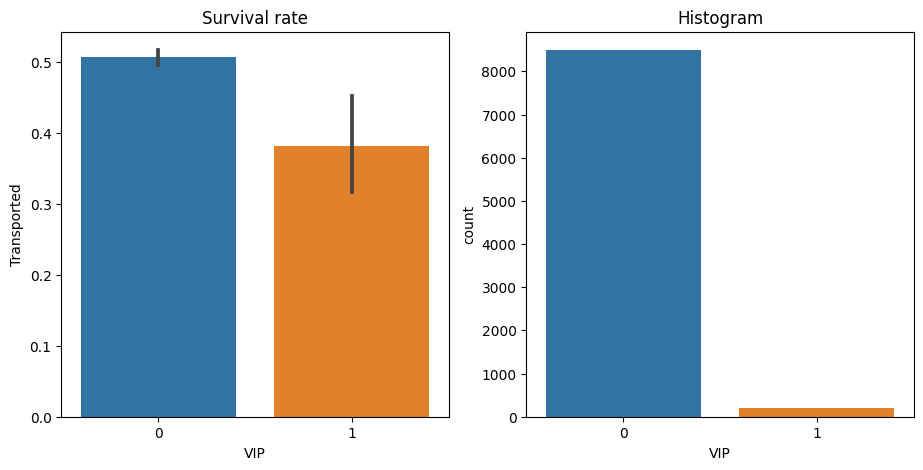

In [35]:
fig,axs = plt.subplots(1,2, figsize=(11,5))
sns.barplot(data=tdata, y="Transported", x="VIP", ax=axs[0]).set(title="Survival rate")
sns.countplot(data=tdata, x="VIP", ax=axs[1]).set(title="Histogram");

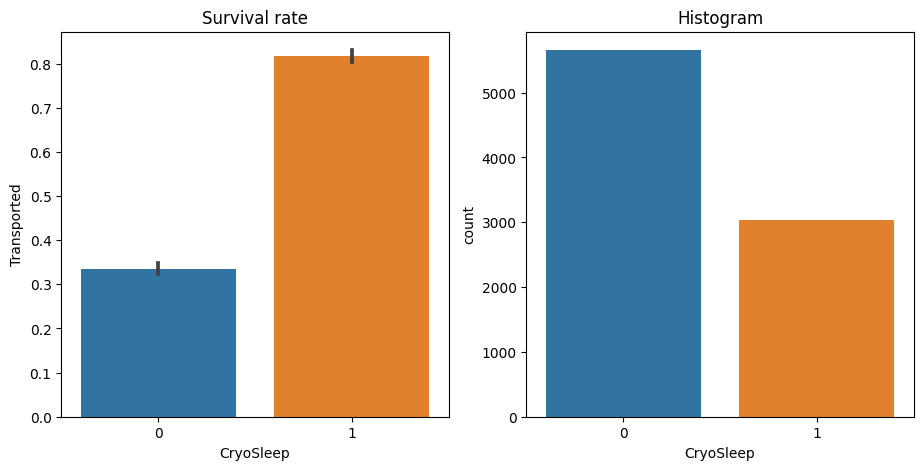

In [36]:
fig,axs = plt.subplots(1,2, figsize=(11,5))
sns.barplot(data=tdata, y="Transported", x="CryoSleep", ax=axs[0]).set(title="Survival rate")
sns.countplot(data=tdata, x="CryoSleep", ax=axs[1]).set(title="Histogram");

Lets plot a continous variable. In this case total spend.

<Axes: xlabel='Log_Total_Spend', ylabel='Density'>

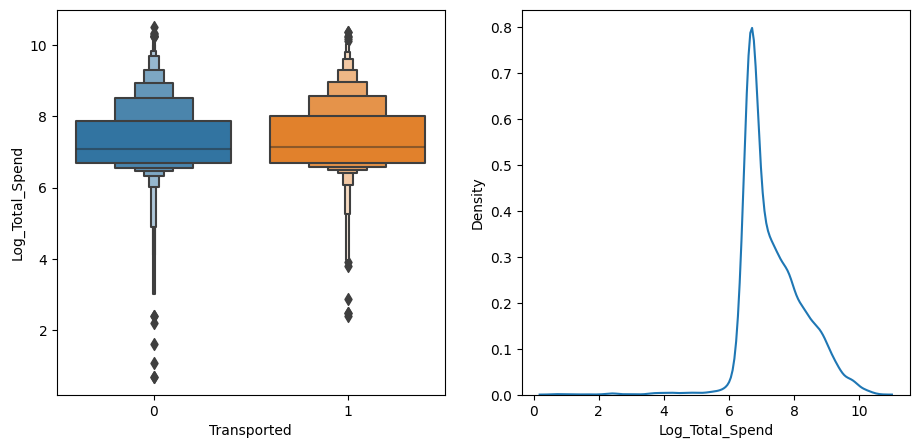

In [37]:
df_spend = tdata[tdata.Total_Spend>0]
fig,axs = plt.subplots(1,2, figsize = (11,5))
sns.boxenplot(data=df_spend, x="Transported", y="Log_Total_Spend", ax=axs[0])
sns.kdeplot(data=df_spend, x="Log_Total_Spend", ax=axs[1])


# Learner Module

In [38]:
from fastai.tabular.all import *

In [39]:
procs = [Categorify, FillMissing, Normalize]
# procs = [Categorify, FillMissing]

In [40]:
splits = RandomSplitter(valid_pct=0.2)(tdata)

In [41]:
to = TabularPandas(tdata,splits = splits, do_setup=True, procs = procs,
                   cat_names = cat_vars, cont_names = cont_vars,
                   y_names = dep_vars, y_block = CategoryBlock())
to.show()

,HomePlanet,CryoSleep,Destination,VIP,PassengerId_missing,HomePlanet_missing,CryoSleep_missing,Cabin_missing,Destination_missing,Age_missing,VIP_missing,RoomService_missing,FoodCourt_missing,ShoppingMall_missing,Spa_missing,VRDeck_missing,Name_missing,Cabin_Deck,Cabin_side,PassengerID_Number,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerID_GroupSize,Log_Total_Spend,Transported
2095,Earth,0,TRAPPIST-1e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,F,P,01,27.0,485.0,1109.0,921.0,0.000031,1.0,1.0,7.830823,0
5723,#na#,0,TRAPPIST-1e,0,0,1,0,0,0,0,0,0,0,0,0,0,0,E,S,01,19.0,3.0,785.0,0.0,0.000031,0.0,1.0,6.670766,1
8329,Earth,0,TRAPPIST-1e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,F,P,01,28.0,0.0,16.0,496.0,318.000000,0.0,1.0,6.722630,0
126,Earth,0,PSO J318.5-22,0,0,0,0,0,0,0,0,0,0,0,0,0,1,G,S,01,47.0,97.0,418.0,126.0,25.000000,55.0,1.0,6.582025,0
3116,Mars,1,TRAPPIST-1e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,F,S,01,25.0,0.0,0.0,0.0,0.000031,0.0,4.0,0.000000,1
5810,Mars,1,TRAPPIST-1e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,F,S,01,43.0,0.0,0.0,0.0,0.000031,0.0,2.0,0.000000,1
1772,Mars,1,TRAPPIST-1e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,E,S,01,48.0,0.0,0.0,0.0,0.000031,0.0,1.0,0.000000,0
1367,Mars,0,TRAPPIST-1e,0,0,0,0,0,0,0,0,0,0,0,1,0,0,D,S,02,30.0,806.0,100.0,9.0,0.000031,47.0,2.0,6.870053,0
2636,Earth,1,TRAPPIST-1e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,G,P,01,44.0,0.0,0.0,0.0,0.000031,0.0,1.0,0.000000,1
2962,Europa,0,55 Cancri e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,E,S,02,20.0,11.0,596.0,0.0,3583.000000,266.0,3.0,8.402231,0


In [42]:
to.ys

,Transported
2095,0
5723,1
8329,0
126,0
3116,1
...,...
6148,0
7880,0
5450,1
673,1


In [43]:
to.xs.iloc[:5]

,HomePlanet,CryoSleep,Destination,VIP,PassengerId_missing,HomePlanet_missing,CryoSleep_missing,Cabin_missing,Destination_missing,Age_missing,...,Cabin_side,PassengerID_Number,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerID_GroupSize,Log_Total_Spend
2095,1,1,3,1,1,1,1,1,1,1,...,1,1,-0.080835,0.410886,0.411527,1.234010,-0.268484,-0.254270,-0.644626,0.971698
5723,0,1,3,1,1,2,1,1,1,1,...,2,1,-0.616714,-0.326737,0.210149,-0.282335,-0.268484,-0.255149,-0.644626,0.657008
8329,1,1,3,1,1,1,1,1,1,1,...,1,1,-0.013850,-0.331328,-0.267813,0.534285,0.007244,-0.255149,-0.644626,0.671077
126,1,1,2,1,1,1,1,1,1,1,...,2,1,1.258864,-0.182885,-0.017955,-0.074887,-0.246807,-0.206810,-0.644626,0.632935
3116,3,2,3,1,1,1,1,1,1,1,...,2,1,-0.214804,-0.331328,-0.277758,-0.282335,-0.268484,-0.255149,1.227607,-1.152577


In [44]:
to.cats

,HomePlanet,CryoSleep,Destination,VIP,PassengerId_missing,HomePlanet_missing,CryoSleep_missing,Cabin_missing,Destination_missing,Age_missing,VIP_missing,RoomService_missing,FoodCourt_missing,ShoppingMall_missing,Spa_missing,VRDeck_missing,Name_missing,Cabin_Deck,Cabin_side,PassengerID_Number
2095,1,1,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,6,1,1
5723,0,1,3,1,1,2,1,1,1,1,1,1,1,1,1,1,1,5,2,1
8329,1,1,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,6,1,1
126,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,2,7,2,1
3116,3,2,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,6,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6148,1,1,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,6,1,1
7880,1,2,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,7,1,1
5450,3,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4,2,3
673,1,2,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,7,2,1


In [45]:
to.conts

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerID_GroupSize,Log_Total_Spend
2095,-0.080835,0.410886,0.411527,1.234010,-0.268484,-0.254270,-0.644626,0.971698
5723,-0.616714,-0.326737,0.210149,-0.282335,-0.268484,-0.255149,-0.644626,0.657008
8329,-0.013850,-0.331328,-0.267813,0.534285,0.007244,-0.255149,-0.644626,0.671077
126,1.258864,-0.182885,-0.017955,-0.074887,-0.246807,-0.206810,-0.644626,0.632935
3116,-0.214804,-0.331328,-0.277758,-0.282335,-0.268484,-0.255149,1.227607,-1.152577
...,...,...,...,...,...,...,...,...
6148,-0.147820,-0.331328,-0.277758,-0.282335,-0.249408,0.650107,-0.644626,0.735306
7880,-0.616714,-0.331328,-0.277758,-0.282335,-0.268484,-0.255149,-0.644626,-1.152577
5450,-0.482744,-0.331328,-0.277758,-0.282335,-0.268484,-0.255149,3.099840,-1.152577
673,-0.683699,-0.331328,-0.277758,-0.282335,-0.268484,-0.255149,-0.644626,-1.152577


In [46]:
to.xs

,HomePlanet,CryoSleep,Destination,VIP,PassengerId_missing,HomePlanet_missing,CryoSleep_missing,Cabin_missing,Destination_missing,Age_missing,...,Cabin_side,PassengerID_Number,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerID_GroupSize,Log_Total_Spend
2095,1,1,3,1,1,1,1,1,1,1,...,1,1,-0.080835,0.410886,0.411527,1.234010,-0.268484,-0.254270,-0.644626,0.971698
5723,0,1,3,1,1,2,1,1,1,1,...,2,1,-0.616714,-0.326737,0.210149,-0.282335,-0.268484,-0.255149,-0.644626,0.657008
8329,1,1,3,1,1,1,1,1,1,1,...,1,1,-0.013850,-0.331328,-0.267813,0.534285,0.007244,-0.255149,-0.644626,0.671077
126,1,1,2,1,1,1,1,1,1,1,...,2,1,1.258864,-0.182885,-0.017955,-0.074887,-0.246807,-0.206810,-0.644626,0.632935
3116,3,2,3,1,1,1,1,1,1,1,...,2,1,-0.214804,-0.331328,-0.277758,-0.282335,-0.268484,-0.255149,1.227607,-1.152577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6148,1,1,3,1,1,1,1,1,1,1,...,1,1,-0.147820,-0.331328,-0.277758,-0.282335,-0.249408,0.650107,-0.644626,0.735306
7880,1,2,3,1,1,1,1,1,1,1,...,1,1,-0.616714,-0.331328,-0.277758,-0.282335,-0.268484,-0.255149,-0.644626,-1.152577
5450,3,2,1,1,1,1,1,1,1,1,...,2,3,-0.482744,-0.331328,-0.277758,-0.282335,-0.268484,-0.255149,3.099840,-1.152577
673,1,2,3,1,1,1,1,1,1,1,...,2,1,-0.683699,-0.331328,-0.277758,-0.282335,-0.268484,-0.255149,-0.644626,-1.152577


Lets create a dataloader

In [47]:
to.cats.dtypes

HomePlanet              int8
CryoSleep               int8
Destination             int8
VIP                     int8
PassengerId_missing     int8
HomePlanet_missing      int8
CryoSleep_missing       int8
Cabin_missing           int8
Destination_missing     int8
Age_missing             int8
VIP_missing             int8
RoomService_missing     int8
FoodCourt_missing       int8
ShoppingMall_missing    int8
Spa_missing             int8
VRDeck_missing          int8
Name_missing            int8
Cabin_Deck              int8
Cabin_side              int8
PassengerID_Number      int8
dtype: object

SO! The following cell was just to resolve the error I got using FastAI. Critical error was not passing in proc objects - I kept sending in strings!

In [48]:
dls = to.dataloaders(path = '.')
dls.show_batch()

,HomePlanet,CryoSleep,Destination,VIP,PassengerId_missing,HomePlanet_missing,CryoSleep_missing,Cabin_missing,Destination_missing,Age_missing,VIP_missing,RoomService_missing,FoodCourt_missing,ShoppingMall_missing,Spa_missing,VRDeck_missing,Name_missing,Cabin_Deck,Cabin_side,PassengerID_Number,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerID_GroupSize,Log_Total_Spend,Transported
0,Mars,1,TRAPPIST-1e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,F,P,01,33.000000,-0.000006,-0.000004,-0.000007,0.000016,-0.000012,1.0,-5.191851e-09,1
1,Earth,0,TRAPPIST-1e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,F,P,01,26.000000,-0.000006,529.999999,1.999996,9.000015,402.999996,1.0,6.851185e+00,0
2,Europa,1,55 Cancri e,0,0,0,0,0,0,0,0,0,0,0,0,1,0,B,S,01,27.000000,-0.000006,-0.000004,-0.000007,0.000016,-0.000012,1.0,-5.191851e-09,1
3,Europa,1,TRAPPIST-1e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,B,S,01,48.000001,-0.000006,-0.000004,-0.000007,0.000016,-0.000012,3.0,-5.191851e-09,1
4,Earth,0,TRAPPIST-1e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,F,P,01,39.000000,505.000019,178.000003,180.999999,0.000016,-0.000012,1.0,6.762730e+00,0
5,Earth,0,TRAPPIST-1e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,G,P,05,9.000000,-0.000006,-0.000004,-0.000007,0.000016,-0.000012,5.0,-5.191851e-09,0
6,#na#,0,TRAPPIST-1e,0,0,1,0,0,0,0,0,0,0,0,0,0,0,F,P,01,25.000000,637.000017,-0.000004,89.000000,312.000000,2.000013,1.0,6.947937e+00,0
7,Earth,0,TRAPPIST-1e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,G,S,01,28.000000,-0.000006,0.999981,11.999992,874.999973,-0.000012,1.0,6.790097e+00,0
8,Europa,0,TRAPPIST-1e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,C,S,01,24.000000,-0.000006,3385.000029,825.999988,9.000015,792.999993,1.0,8.519989e+00,1
9,Mars,0,TRAPPIST-1e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,F,S,01,58.000001,849.999997,-0.000004,21.999997,1493.000031,-0.000012,1.0,7.768956e+00,0


In [49]:
learn = tabular_learner(dls, metrics = accuracy)

In [50]:
learn.summary()

TabularModel (Input shape: 64 x 20)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 3              
Embedding                                 12         True      
Embedding                                 9          True      
Embedding                                 12         True      
Embedding                                 9          True      
____________________________________________________________________________
                     64 x 2              
Embedding                                 4          True      
____________________________________________________________________________
                     64 x 3              
Embedding                                 9          True      
Embedding                                 9          True      
Embedding                                 9          True      
Embedding                                 9          True      
Embedding                                 9 

SuggestedLRs(slide=0.015848932787775993, valley=0.0006918309954926372)

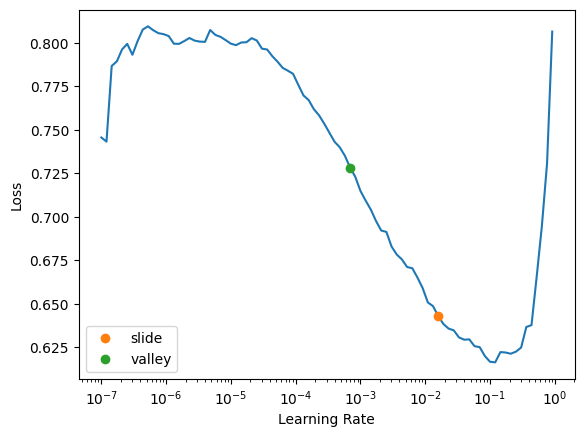

In [51]:
learn.lr_find(suggest_funcs=(slide, valley))

In [52]:
learn.fit(18, lr = 0.008)

epoch,train_loss,valid_loss,accuracy,time
0,0.474293,0.591915,0.628308,00:04
1,0.471088,0.420762,0.785385,00:03
2,0.452707,0.405936,0.803222,00:03
3,0.451355,0.415082,0.791715,00:03
4,0.444303,0.423647,0.788838,00:03
5,0.439230,0.409577,0.796318,00:03
6,0.438208,0.423877,0.796318,00:03
7,0.435796,0.407071,0.800921,00:03
8,0.434237,0.400898,0.794591,00:03
9,0.432303,0.406571,0.803797,00:03


***Submission Module***

Lets get this new nn model into Kaggle and see how we did.

In [53]:
test_df = pd.read_csv('test.csv')
test_df.describe (include = 'all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
count,4277,4190,4184,4177,4185,4186.000000,4184,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000,4183
unique,4277,3,2,3265,3,NaN,2,NaN,NaN,NaN,NaN,NaN,4176
top,0013_01,Earth,False,G/160/P,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Cints Erle
freq,1,2263,2640,8,2956,NaN,4110,NaN,NaN,NaN,NaN,NaN,2
mean,NaN,NaN,NaN,NaN,NaN,28.658146,NaN,219.266269,439.484296,177.295525,303.052443,310.710031,NaN
std,NaN,NaN,NaN,NaN,NaN,14.179072,NaN,607.011289,1527.663045,560.821123,1117.186015,1246.994742,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,26.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,37.000000,NaN,53.000000,78.000000,33.000000,50.000000,36.000000,NaN


In [54]:
test_df.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [55]:
add_features(test_df)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck_missing,Name_missing,Cabin_Deck,Cabin_number,Cabin_side,PassengerID_Group,PassengerID_Number,PassengerID_GroupSize,Total_Spend,Log_Total_Spend
0,0013_01,Earth,1,G/3/S,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,...,0,0,G,3,S,0013,01,0.0,0.0,0.000000
1,0018_01,Earth,0,F/4/S,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,...,0,0,F,4,S,0018,01,0.0,2832.0,7.949091
2,0019_01,Europa,1,C/0/S,55 Cancri e,31.0,0,0.0,0.0,0.0,...,0,0,C,0,S,0019,01,0.0,0.0,0.000000
3,0021_01,Europa,0,C/1/S,TRAPPIST-1e,38.0,0,0.0,6652.0,0.0,...,0,0,C,1,S,0021,01,0.0,7418.0,8.911800
4,0023_01,Earth,0,F/5/S,TRAPPIST-1e,20.0,0,10.0,0.0,635.0,...,0,0,F,5,S,0023,01,0.0,645.0,6.470800


In [56]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck_missing,Name_missing,Cabin_Deck,Cabin_number,Cabin_side,PassengerID_Group,PassengerID_Number,PassengerID_GroupSize,Total_Spend,Log_Total_Spend
0,0013_01,Earth,1,G/3/S,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,...,0,0,G,3,S,0013,01,0.0,0.0,0.000000
1,0018_01,Earth,0,F/4/S,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,...,0,0,F,4,S,0018,01,0.0,2832.0,7.949091
2,0019_01,Europa,1,C/0/S,55 Cancri e,31.0,0,0.0,0.0,0.0,...,0,0,C,0,S,0019,01,0.0,0.0,0.000000
3,0021_01,Europa,0,C/1/S,TRAPPIST-1e,38.0,0,0.0,6652.0,0.0,...,0,0,C,1,S,0021,01,0.0,7418.0,8.911800
4,0023_01,Earth,0,F/5/S,TRAPPIST-1e,20.0,0,10.0,0.0,635.0,...,0,0,F,5,S,0023,01,0.0,645.0,6.470800


In [58]:
# add_features(test_df)
make_category (test_df, cat_vars)
# test_df[cat_vars] = test_df[cat_vars].apply(lambda x: x.cat.codes if x.dtypes == 'category' else x)
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck_missing,Name_missing,Cabin_Deck,Cabin_number,Cabin_side,PassengerID_Group,PassengerID_Number,PassengerID_GroupSize,Total_Spend,Log_Total_Spend
0,0013_01,Earth,1,G/3/S,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,...,0,0,G,3,S,0013,01,0.0,0.0,0.000000
1,0018_01,Earth,0,F/4/S,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,...,0,0,F,4,S,0018,01,0.0,2832.0,7.949091
2,0019_01,Europa,1,C/0/S,55 Cancri e,31.0,0,0.0,0.0,0.0,...,0,0,C,0,S,0019,01,0.0,0.0,0.000000
3,0021_01,Europa,0,C/1/S,TRAPPIST-1e,38.0,0,0.0,6652.0,0.0,...,0,0,C,1,S,0021,01,0.0,7418.0,8.911800
4,0023_01,Earth,0,F/5/S,TRAPPIST-1e,20.0,0,10.0,0.0,635.0,...,0,0,F,5,S,0023,01,0.0,645.0,6.470800


In [63]:
tst_dl = learn.dls.test_dl(test_df)
preds,_=learn.get_preds(dl=tst_dl)

In [64]:
preds

tensor([[0.2234, 0.7766],
        [0.8621, 0.1379],
        [0.0015, 0.9985],
        ...,
        [0.0036, 0.9964],
        [0.4190, 0.5810],
        [0.1899, 0.8101]])

In [65]:
preds[:,1]>0.5

tensor([ True, False,  True,  ...,  True,  True,  True])

Lets create that csv file.

In [66]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck_missing,Name_missing,Cabin_Deck,Cabin_number,Cabin_side,PassengerID_Group,PassengerID_Number,PassengerID_GroupSize,Total_Spend,Log_Total_Spend
0,0013_01,Earth,1,G/3/S,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,...,0,0,G,3,S,0013,01,0.0,0.0,0.000000
1,0018_01,Earth,0,F/4/S,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,...,0,0,F,4,S,0018,01,0.0,2832.0,7.949091
2,0019_01,Europa,1,C/0/S,55 Cancri e,31.0,0,0.0,0.0,0.0,...,0,0,C,0,S,0019,01,0.0,0.0,0.000000
3,0021_01,Europa,0,C/1/S,TRAPPIST-1e,38.0,0,0.0,6652.0,0.0,...,0,0,C,1,S,0021,01,0.0,7418.0,8.911800
4,0023_01,Earth,0,F/5/S,TRAPPIST-1e,20.0,0,10.0,0.0,635.0,...,0,0,F,5,S,0023,01,0.0,645.0,6.470800


In [67]:
def sub_csv(tst_df, preds, suff):
    # tst_df['Transported'] = preds
    tst_df['Transported'] = (preds[:,1]>0.5)
    # tst_df['Transported'] = (preds[:,1]).round(decimals=0)
    # tst_df['Transported'] = tst_df['Transported'].astype(int)
    sub_df = tst_df[['PassengerId','Transported']]
    sub_df.to_csv(f'sub-{suff}.csv', index=False)

# test_preds = learn.predict(test_df_xs)
test_preds,_=learn.get_preds(dl=tst_dl)

sub_csv(test_df, test_preds, 'nn_features')

In [68]:
!head sub-nn_features.csv 

PassengerId,Transported
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,False
0027_01,False
0029_01,True
0032_01,True
0032_02,True


Lets get to submitting!!

In [69]:
!kaggle competitions submit -f sub-nn_features.csv -m "Fifth submission to Kaggle. NN_wfeatures" spaceship-titanic

100%|██████████████████████████████████████| 56.4k/56.4k [00:02<00:00, 24.4kB/s]
Successfully submitted to Spaceship Titanic

In [70]:
!kaggle competitions leaderboard spaceship-titanic --show | grep -E -n -e "Zach Zacharia" | tail -n 1

572:10891694  Zach Zacharia                                   2023-10-02 19:44:31  0.80009  


# Results
Your most recent submission scored 0.80009, which is an improvement of your previous score of 0.79985. Great job!

So it appears that adding features is key. But not by much